- This python notebook contains the CNN model for classifying mammogram images for BENIGN, MALIGNANT cancer.

- It uses publicly available CBIS-DDSM (Curated Breast Imaging Subset DDSM Dataset (Mammography)) dataset from Kaggle and other sources

- This particular program uses serveral Opencv image manipulation techniques and ImageDataGenerator packages for keras tensorflow

- Contrast enhancing techniques, in addtion to merging ROI (region of interest) images to the full mammogram images are used

- Additionally, it employ transfer learning techquines, that uses pretrained models.

**1. Install Packages as needed**

In [ ]:
%pip install tensorflow
%pip install opencv-python
%pip install tensorflow_addons==0.21.0
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

**2. Import important libraries and packages**

In [ ]:
import numpy as np
import pandas as pd
import os
#import opendatasets as od
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

2a. Below commented code downloads dataset directly from Kaggle; needs kaggle account and Kaggle API key (to be downloaded from Kaggle)

In [ ]:
# Download the breast cancer image dataset from Kaggle
#print("Downloading dataset...")
#od.download("https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset")

**3. Import csv files into Pandas dataframes and perform exploratory data analysis**

- mass and calc are two csv files that contain information about cancer mass and calcifications

- they contain paths to mammogram images of type 1) full mammo images 2) cropped images 3) roi images

In [ ]:
mass_test = pd.read_csv('/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_test_set.csv')
mass_train = pd.read_csv('/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv')
calc_train = pd.read_csv('/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv')
calc_test = pd.read_csv('/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_test_set.csv')

In [ ]:
# Examine the columns and other details in the provided data
mass_train.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [ ]:
mass_train.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [ ]:
print(f'Mass train columns: {mass_train.columns}')
print(f'Mass test columns: {mass_test.columns}')

Mass train columns: Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')
Mass test columns: Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')


In [ ]:
# print the shape of both dataframes
print(f'Shape of Mass train: {mass_train.shape}')
print(f'Shape of Mass test: {mass_test.shape}')

Shape of Mass train: (1318, 14)
Shape of Mass test: (378, 14)


- 3a. Dicom (Digital imaging and communciation in Medicine) csv file contain details about how the images are stored and other record details
- Meta csv file contains meta data

In [ ]:
df_dicom = pd.read_csv('/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')
df_dicom.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [ ]:
meta = pd.read_csv('/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/csv/meta.csv')
meta.head()

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


In [ ]:
# print the seriesdescription unique values from dicom and meta dataframes
print(df_dicom['SeriesDescription'].unique())
print(meta.SeriesDescription.unique())

['cropped images' 'full mammogram images' nan 'ROI mask images']
['ROI mask images' 'cropped images' 'full mammogram images']


In [ ]:
# Rename columns to remove spaces
mass_train.columns = [col.replace(' ', '_') for col in mass_train.columns]
mass_test.columns = [col.replace(' ','_') for col in mass_test.columns]
calc_train.columns = [col.replace(' ', '_') for col in calc_train.columns]
calc_test.columns = [col.replace(' ', '_') for col in calc_test.columns]


In [ ]:
print(f'Mass train columns: {mass_train.columns}')
print(f'Calc train columns: {calc_train.columns}')

Mass train columns: Index(['patient_id', 'breast_density', 'left_or_right_breast', 'image_view',
       'abnormality_id', 'abnormality_type', 'mass_shape', 'mass_margins',
       'assessment', 'pathology', 'subtlety', 'image_file_path',
       'cropped_image_file_path', 'ROI_mask_file_path'],
      dtype='object')
Calc train columns: Index(['patient_id', 'breast_density', 'left_or_right_breast', 'image_view',
       'abnormality_id', 'abnormality_type', 'calc_type', 'calc_distribution',
       'assessment', 'pathology', 'subtlety', 'image_file_path',
       'cropped_image_file_path', 'ROI_mask_file_path'],
      dtype='object')


In [ ]:
# check for missing data and bfill

mass_train['mass_shape'] = mass_train['mass_shape'].bfill()
mass_train['mass_margins'] = mass_train['mass_margins'].bfill()

mass_test['mass_margins'] = mass_test['mass_margins'].bfill()

In [ ]:
print(f'Train: \n {mass_train.isnull().sum()}')
print(f'Test: \n {mass_test.isnull().sum()}')

Train: 
 patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64
Test: 
 patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64


- 3b. The images are orginzed in a sperate directory called jpeg, which contains subdirectories whose names are part of the file paths

Below code gets the file paths sorted out by replacing dicom names with local paths and finally the paths that point to the correct subdirectories in the jpeg directory

In [ ]:
imgdir = '/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/jpeg'

In [ ]:
# Collect all image path based on each type using series description
cropped_images = df_dicom[df_dicom.SeriesDescription=='cropped images'].image_path
full_mammo = df_dicom[df_dicom.SeriesDescription=='full mammogram images'].image_path
roi_img = df_dicom[df_dicom.SeriesDescription=='ROI mask images'].image_path

In [ ]:
# Replace the dataset paths to images to the local directory paths
cropped_images = cropped_images.replace('CBIS-DDSM/jpeg', imgdir, regex=True)
full_mammo = full_mammo.replace('CBIS-DDSM/jpeg', imgdir, regex=True)
roi_img = roi_img.replace('CBIS-DDSM/jpeg', imgdir, regex=True)

# view new paths
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammo.iloc[0])
print('ROI Mask Images paths:\n')
print(roi_img.iloc[0])

Cropped Images paths:

/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Full mammo Images paths:

/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
ROI Mask Images paths:

/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [ ]:
# Prepare key value pairs for the images (path and image)

full_mammo_dict = dict()
cropped_images_dict = dict()
roi_img_dict = dict()

for dicom in full_mammo:
    key = dicom.split("/")[7]
    full_mammo_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[7]
    cropped_images_dict[key] = dicom
for dicom in roi_img:
    key = dicom.split("/")[7]
    roi_img_dict[key] = dicom

# view keys
print(next(iter((full_mammo_dict.items()))))
print(next(iter((cropped_images_dict.items()))))
print(next(iter((roi_img_dict.items()))))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849', '/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')
('1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304', '/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg')
('1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138', '/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg')


In [ ]:
mass_train.values

array([['P_00001', 3, 'LEFT', ...,
        'Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/000000.dcm',
        'Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000000.dcm',
        'Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000001.dcm\n'],
       ['P_00001', 3, 'LEFT', ...,
        'Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.319478999311971442426185353560182990988/1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/000000.dcm',
        'Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000000.dcm',
        '

In [ ]:
mass_train.iloc[0,11]

'Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/000000.dcm'

In [ ]:
# Write a function to create the full image path
def fix_image_path(data):
    """correct dicom paths to correct image paths"""
    for index, img in enumerate(data.values):
        img_name = img[11].split("/")[2]
        data.iloc[index,11] = full_mammo_dict[img_name]
        img_name = img[12].split("/")[2]
        data.iloc[index,12] = cropped_images_dict[img_name]
        img_name = img[13].split("/")[2]
        data.iloc[index,13] = roi_img_dict[img_name]

# apply to datasets
fix_image_path(mass_train)
fix_image_path(mass_test)

In [ ]:
print(f'Mass train new paths {mass_train.iloc[:5,11]}')
print(f'Mass test new paths {mass_test.iloc[:5,11]}')

Mass train new paths 0    /content/drive/MyDrive/Kaggle/cbis-ddsm-breast...
1    /content/drive/MyDrive/Kaggle/cbis-ddsm-breast...
2    /content/drive/MyDrive/Kaggle/cbis-ddsm-breast...
3    /content/drive/MyDrive/Kaggle/cbis-ddsm-breast...
4    /content/drive/MyDrive/Kaggle/cbis-ddsm-breast...
Name: image_file_path, dtype: object
Mass test new paths 0    /content/drive/MyDrive/Kaggle/cbis-ddsm-breast...
1    /content/drive/MyDrive/Kaggle/cbis-ddsm-breast...
2    /content/drive/MyDrive/Kaggle/cbis-ddsm-breast...
3    /content/drive/MyDrive/Kaggle/cbis-ddsm-breast...
4    /content/drive/MyDrive/Kaggle/cbis-ddsm-breast...
Name: image_file_path, dtype: object


In [ ]:
mass_train.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...


In [ ]:
# select three image columns from mass_train and print them
print(mass_train['image_file_path'][0])
print(mass_train['cropped_image_file_path'][0])
print(mass_train['ROI_mask_file_path'][0])

/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg
/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/2-249.jpg
/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/1-250.jpg


Full Mammograms:



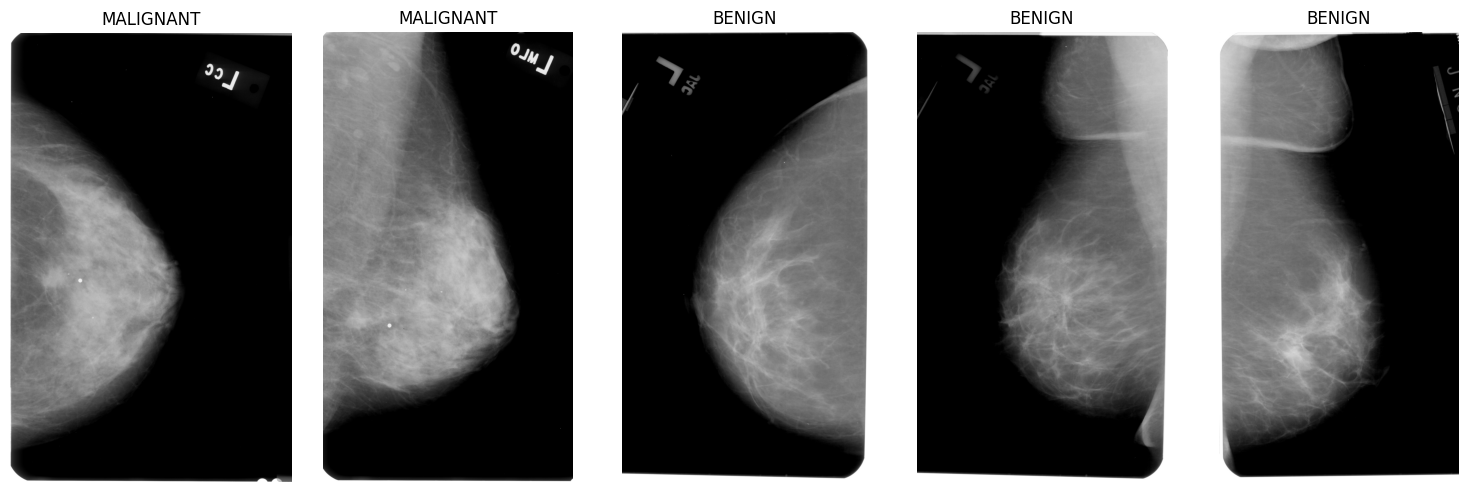

Cropped Mammograms:



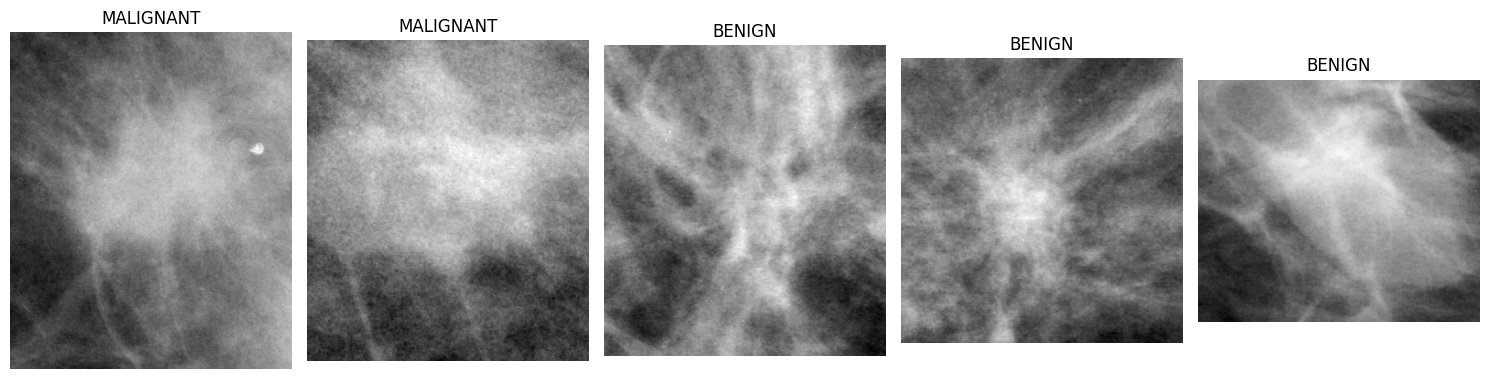

ROI mask:



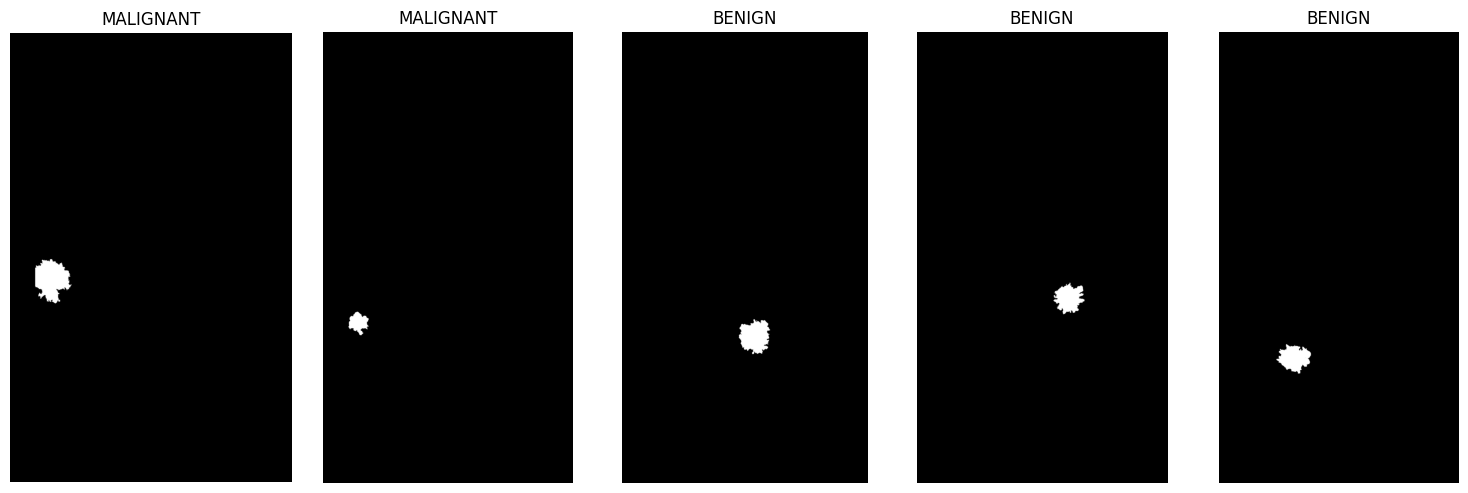

In [ ]:
# Display the images to check the images

def display_images(column, number):
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

    # Loop through rows and display images
    for index, row in mass_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print('Full Mammograms:\n')
display_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)
print('ROI mask:\n')
display_images('ROI_mask_file_path', 5)

In [ ]:
import cv2
import matplotlib.pyplot as plt

# merge the images base image (full mammo) and ROI image
# and create contrast adjusted images using convertscaleabs

def preprocess_images(full_mammogram_path, roi_mask_path):
    """Preprocesses the full mammogram and ROI mask images."""
    # Read the mamo image using cv2
    mamo_img = cv2.imread(full_mammogram_path)
    roi_img = cv2.imread(roi_mask_path)

    # Convert the mamo image to Gray
    mamo_img_gray = cv2.cvtColor(mamo_img, cv2.COLOR_BGR2GRAY)
    roi_img_gray = cv2.cvtColor(roi_img, cv2.COLOR_BGR2GRAY)

    # create the mask from roi images using global thresholding
    _, roi_mask = cv2.threshold(roi_img_gray, 127, 255, cv2.THRESH_BINARY)

    # create a negative mask of roi image using biwise not
    roi_mask_ng = cv2.bitwise_not(roi_img_gray)


    # create final image background by bitwise and and using roi_mask as a mask value
    # resize the mask before the bitwise and
    roi_mask_ng = cv2.resize(roi_mask_ng, (mamo_img_gray.shape[1], mamo_img_gray.shape[0]))
    bckg_img = cv2.bitwise_and(mamo_img_gray, mamo_img_gray, mask=roi_mask_ng)

    # create final image foreground by bitwise and and using roi_mask_ng as a mask value
    # resize the mask before the bitwise and
    roi_mask = cv2.resize(roi_mask, (mamo_img_gray.shape[1], mamo_img_gray.shape[0]))
    fg_img = cv2.bitwise_and(mamo_img_gray, mamo_img_gray, mask=roi_mask)

    # adjust the contrast of foreground image before creating the final image
    alpha = 1.5
    beta = 0

    fg_img_c = cv2.convertScaleAbs(fg_img, alpha=alpha, beta=beta)

    # add background and foreground images and display final image
    final_img = cv2.add(bckg_img, fg_img_c)

    return final_img

In [ ]:
# Apply the preprocess step to the entire mass_train_2c and mass_test_2c dataset
mass_train['preprocessed_images'] = mass_train.apply(lambda x: preprocess_images(x['image_file_path'], x['ROI_mask_file_path']), axis=1)
mass_test['preprocessed_images'] = mass_test.apply(lambda x: preprocess_images(x['image_file_path'], x['ROI_mask_file_path']), axis=1)

In [ ]:
mass_train.columns

Index(['patient_id', 'breast_density', 'left_or_right_breast', 'image_view',
       'abnormality_id', 'abnormality_type', 'mass_shape', 'mass_margins',
       'assessment', 'pathology', 'subtlety', 'image_file_path',
       'cropped_image_file_path', 'ROI_mask_file_path', 'preprocessed_images'],
      dtype='object')

In [ ]:
# check the contents of file path columns to verify if the files now are pointing to correct local paths
mass_train.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,preprocessed_images
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,"[[190, 188, 185, 185, 187, 189, 189, 189, 187,..."
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,"[[255, 1, 254, 255, 254, 254, 253, 255, 255, 2..."


In [ ]:
full_mammogram_path = mass_train['image_file_path'][0] # path to full mammogram image
print(full_mammogram_path)

/content/drive/MyDrive/Kaggle/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg


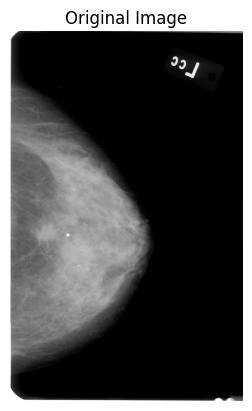

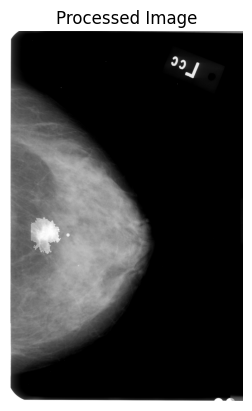

In [ ]:
# show some smaple images from the processed images
# read an image from the path
img_2disp = plt.imread(mass_train['image_file_path'][0])
plt.imshow(img_2disp, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

plt.imshow(mass_train['preprocessed_images'][0], cmap='gray')
plt.title('Processed Image')
plt.axis('off')
plt.show()

In [ ]:
# Combine the mass dataframes to create a combined dataframe for splitting lateron
mass_combined = pd.concat([mass_train, mass_test], axis=0)

In [ ]:
mass_combined.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,preprocessed_images
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,"[[190, 188, 185, 185, 187, 189, 189, 189, 187,..."
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,/content/drive/MyDrive/Kaggle/cbis-ddsm-breast...,"[[255, 1, 254, 255, 254, 254, 253, 255, 255, 2..."


In [ ]:
mass_combined.shape

(1696, 15)

In [ ]:
# Prepare data for X, y splitting
labels = mass_combined['pathology']
img_data = mass_combined['preprocessed_images']

In [ ]:
labels.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [ ]:
print(f"Shape of labels: {labels.shape}")
print(f"Shape of data: {img_data.shape}")

Shape of labels: (1696,)
Shape of data: (1696,)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import cv2 # Import cv2

# Define image size
IMG_HEIGHT = 224
IMG_WIDTH = 224

def prepare_image_data(img_data_series, labels_series):
    """
    Processes images and labels for CNN input, ensuring alignment.

    Args:
        img_data_series (pd.Series): Series containing image data (NumPy arrays from preprocess_images).
        labels_series (pd.Series): Series containing pathology labels.

    Returns:
        tuple: Processed image data (NumPy array, shape (num_valid_samples, IMG_HEIGHT, IMG_WIDTH, 1)),
               numeric labels (NumPy array, shape (num_valid_samples,)).
    """
    processed_images_list = []
    numeric_labels_list = []

    # Define label mapping
    label_map = {'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0, 'MALIGNANT': 1}

    # Iterate through image data and labels together
    # Using zip assumes the series are aligned by index, which they are if they
    # come from the same DataFrame.
    for img, label_str in zip(img_data_series, labels_series):
        # Check if the image data is valid and has the expected 2D shape
        if img is None or not isinstance(img, np.ndarray) or len(img.shape) != 2:
             # print(f"Warning: Skipping invalid or unexpectedly shaped image data. Shape: {getattr(img, 'shape', 'N/A')}")
             continue # Skip this sample if image data is invalid

        # Map label string to numeric value
        if label_str not in label_map:
             # print(f"Warning: Skipping sample with unhandled label: {label_str}")
             continue # Skip if label is not one we handle

        numeric_label = label_map[label_str]

        # Resize image
        try:
            img_resized = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_AREA) # Use INTER_AREA for shrinking
        except cv2.error as e:
            # print(f"Warning: Error during image resizing: {e}. Skipping sample.")
            continue # Skip sample if resize fails

        # Normalize image (scale pixel values to [0, 1])
        # Ensure dtype is float32 as required for CNN input later
        img_normalized = img_resized.astype('float32') / 255.0

        # Expand dimensions for channel (CNN expects (height, width, channels))
        # Add the channel dimension for grayscale (1 channel)
        img_processed = np.expand_dims(img_normalized, axis=-1) # Shape becomes (IMG_HEIGHT, IMG_WIDTH, 1)

        # Append processed image and corresponding numeric label
        processed_images_list.append(img_processed)
        numeric_labels_list.append(numeric_label)

    # Convert lists to numpy arrays
    if not processed_images_list:
        print("Error: No valid images were processed.")
        return np.array([]), np.array([]) # Return empty arrays if no data was processed

    processed_images_array = np.array(processed_images_list)
    numeric_labels_array = np.array(numeric_labels_list)

    return processed_images_array, numeric_labels_array

# Process the data
# Pass the specific columns containing image data and labels
X, y = prepare_image_data(mass_combined['preprocessed_images'], mass_combined['pathology'])

print(f"Shape of processed images (X): {X.shape}")
print(f"Shape of numeric labels (y): {y.shape}")

# Split data into training and testing sets
# Ensure stratification works with numeric labels (0 or 1)
# The counts of X and y should now be equal, resolving the ValueError
if X.shape[0] > 0: # Proceed only if valid data was processed
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"Shape of training images: {X_train.shape}")
    print(f"Shape of testing images: {X_test.shape}")
    print(f"Shape of training labels: {y_train.shape}")
    print(f"Shape of testing labels: {y_test.shape}")
else:
    print("Skipping train/test split due to no valid processed data.")

Shape of processed images (X): (1696, 224, 224, 1)
Shape of numeric labels (y): (1696,)
Shape of training images: (1356, 224, 224, 1)
Shape of testing images: (340, 224, 224, 1)
Shape of training labels: (1356,)
Shape of testing labels: (340,)


- Import keras tensorflow packages and pretrained models

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications import (
    EfficientNetB0, ResNet50,
    DenseNet121, DenseNet169,
    InceptionV3, InceptionResNetV2,
    EfficientNetV2B0
)
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
#import tensorflow_addons as tfa
import math

In [ ]:
# ---------------------------------------------------
# 1. Image processing utilities
# ---------------------------------------------------

def apply_clahe(img, clip_limit=2.0, tile_grid_size=(8,8)):
    """
    Apply CLAHE to enhance contrast on a grayscale image.
    """
    # Ensure the input image is grayscale (2D)
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    return clahe.apply(img)


def preprocess_image(path, target_size=(224,224)):
    """
    Read image from disk, convert to grayscale, apply CLAHE, resize, normalize.
    Returns an image tensor.
    """
    # Load
    img = cv2.imread(path, cv2.IMREAD_COLOR) # Read as color to be safe, then convert
    if img is None:
        print(f"Warning: Could not read image at path {path}")
        return np.zeros((*target_size, 3), dtype=np.float32) # Return a black image or handle error appropriately


    # Convert to grayscale if not already
    if len(img.shape) == 3 and img.shape[-1] == 3:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    elif len(img.shape) == 2: # Already grayscale
        img_gray = img
    else:
        print(f"Warning: Unexpected image shape {img.shape} at path {path}")
        return np.zeros((*target_size, 3), dtype=np.float32) # Handle unexpected shape

    # Contrast enhancement
    img_clahe = apply_clahe(img_gray)

    # Resize
    img_resized = cv2.resize(img_clahe, target_size, interpolation=cv2.INTER_CUBIC)

    # Normalize to 0-1
    img_normalized = img_resized.astype(np.float32) / 255.0

    # Expand to 3 channels (duplicate the single channel)
    img_processed = np.stack([img_normalized, img_normalized, img_normalized], axis=-1)

    return img_processed

In [ ]:
# ---------------------------------------------------
# 2. Dataset pipelines
# ---------------------------------------------------


def create_tf_dataset(X_data, y_data, batch_size=16, shuffle=True, augment=False):
    """
    Builds a tf.data.Dataset for efficient prefetching and augmentation
    from preprocessed image data (NumPy array) and labels (NumPy array).

    Args:
        X_data (np.ndarray): Preprocessed image data (NumPy array).
        y_data (np.ndarray): Numeric labels (NumPy array).
        batch_size (int): Batch size for the dataset.
        shuffle (bool): Whether to shuffle the dataset.
        augment (bool): Whether to apply data augmentation.

    Returns:
        tf.data.Dataset: The created TensorFlow dataset.
    """
    # Create a dataset directly from the NumPy arrays
    ds = tf.data.Dataset.from_tensor_slices((X_data, y_data))

    if shuffle:
        # Shuffle buffer should be large enough, ideally size of the dataset
        # Use the size of the dataset for shuffling buffer
        ds = ds.shuffle(buffer_size=len(X_data), reshuffle_each_iteration=True)

    # The data is already preprocessed (resized, normalized, channel expanded)
    # and labels are numeric from prepare_image_data.
    # Only need to cast labels to float32 for binary crossentropy loss.
    def _process_data(img, label):
        # Image is already preprocessed and normalized from prepare_image_data
        # Ensure label is float32 for binary crossentropy
        label = tf.cast(label, tf.float32)
        return img, label

    # Map the basic processing function
    ds = ds.map(_process_data, num_parallel_calls=tf.data.AUTOTUNE)

    # Apply augmentation if requested (using TensorFlow ops)
    if augment:
        def augment_fn(img, label):
            # Assuming img is a 3-channel tensor from prepare_image_data
            # Apply TensorFlow image augmentation ops
            img = tf.image.random_flip_left_right(img)
            img = tf.image.random_brightness(img, max_delta=0.15)
            img = tf.image.random_contrast(img, lower=0.85, upper=1.15)
            # For small rotations without addons, you can approximate with 90° multiples:
            k = tf.random.uniform([], 0, 4, dtype=tf.int32)
            img = tf.image.rot90(img, k)
            return img, label
        ds = ds.map(augment_fn, num_parallel_calls=tf.data.AUTOTUNE)

    # Batch the dataset and prefetch for performance
    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return ds

In [ ]:
# ---------------------------------------------------
# 3. Model & Training Options
# ---------------------------------------------------

def get_model(input_shape=(224,224,3), base="efficientnetb0", fine_tune_at=100):
    """
    Create a binary classifier with a chosen pretrained backbone.
    Supported bases: efficientnetb0, efficientnetv2b0, resnet50,
    densenet121, densenet169, inceptionv3, inception_resnetv2
    """
    b = base.lower()
    if b == "efficientnetb0":
        backbone = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')
    elif b == "efficientnetv2b0":
        backbone = EfficientNetV2B0(input_shape=input_shape, include_top=False, weights='imagenet')
    elif b == "resnet50":
        backbone = ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')
    elif b == "densenet121":
        backbone = DenseNet121(input_shape=input_shape, include_top=False, weights='imagenet')
    elif b == "densenet169":
        backbone = DenseNet169(input_shape=input_shape, include_top=False, weights='imagenet')
    elif b == "inceptionv3":
        backbone = InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')
    elif b == "inception_resnetv2":
        backbone = InceptionResNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    else:
        raise ValueError(f"Unsupported backbone: {base}")

    # Freeze initial layers
    for layer in backbone.layers[:fine_tune_at]:
        layer.trainable = False

    x = layers.GlobalAveragePooling2D()(backbone.output)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    return models.Model(inputs=backbone.input, outputs=outputs)

# Training Algorithm Options

def train_with_adam(model, train_ds, val_ds, epochs=30):
    """
    Adam optimizer + ReduceLROnPlateau + EarlyStopping
    """
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        # Use binary crossentropy for binary classification
        loss='binary_crossentropy',
        metrics=['accuracy','AUC']
    )
    cbs = [
        callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3),
        # Added mode='max' for monitoring 'val_auc'
        callbacks.EarlyStopping(monitor='val_AUC', patience=5, restore_best_weights=True, mode='max')
    ]
    return model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=cbs)


def train_with_cosine(model, train_ds, val_ds, epochs=30):
    """
    Adam optimizer with CosineDecay learning rate schedule
    (no built-in weight decay).
    """
    # Calculate total steps correctly from dataset length and epochs
    total_steps = epochs * tf.data.Dataset.cardinality(train_ds).numpy()
    if total_steps < 0: # Handle unknown cardinality (-1)
         # Fallback to a reasonable estimate if dataset size is unknown
         # You might need to manually determine or estimate your steps per epoch
         steps_per_epoch = len(train_ds) if hasattr(train_ds, '__len__') else 1000 # Estimate steps per epoch
         total_steps = epochs * steps_per_epoch


    lr_schedule = optimizers.schedules.CosineDecay(
        initial_learning_rate=1e-3,
        decay_steps=total_steps
    )
    model.compile(
        optimizer=optimizers.Adam(learning_rate=lr_schedule),
        # Use binary crossentropy for binary classification
        loss='binary_crossentropy',
        metrics=['accuracy','AUC']
    )
    cbs = [
        # Added mode='max' for monitoring 'val_auc'
        callbacks.EarlyStopping(monitor='val_AUC', patience=7, restore_best_weights=True, mode='max')
    ]
    return model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=cbs)

In [ ]:
# Import sklearn metrics packages
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, balanced_accuracy_score

In [ ]:

# Evaluate the model and Print metrics

def evaluate_model(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    # print confusion matrix, and other evaluation metrics
    from sklearn.metrics import confusion_matrix, classification_report
    y_pred = model.predict(val_ds)
    y_pred = np.round(y_pred).astype(int)
    y_true = np.concatenate([y for x, y in val_ds], axis=0)
    print(f'Confusion Matrix: \n{confusion_matrix(y_true, y_pred)}')

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted')
    plt.ylabel('True')

    print(f'Classification Report: \n{classification_report(y_true, y_pred)}')
    print("AUC:", roc_auc_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("Specificity:", recall_score(y_true, y_pred, pos_label=0))
    print("Balanced Accuracy:", balanced_accuracy_score(y_true, y_pred))

In [ ]:
# ---------------------------------------------------
# 4. Usage Example
# ---------------------------------------------------
# ---------------------------------------------------
# 4. Usage Example
# ---------------------------------------------------
import numpy as np
import cv2 # Make sure cv2 is imported for any image processing if needed later

if __name__ == "__main__":
    # X_paths and y are no longer directly used here.
    # X_train, X_test, y_train, y_test were created earlier
    # by calling prepare_image_data and train_test_split.

    # Create datasets using the preprocessed numpy arrays
    # Pass X_train/X_test and y_train/y_test directly
    # Use the corrected function name: create_tf_dataset
    train_ds = create_tf_dataset(X_train, y_train, batch_size=16, shuffle=True, augment=True)
    val_ds   = create_tf_dataset(X_test, y_test, batch_size=16, shuffle=False, augment=False) # Usually no shuffle or augment for validation

    # Build model
    # Input shape should match the processed images.
    # The prepare_image_data function now ensures the shape is (height, width, 1) for grayscale
    # and the fix in preprocess_image function returned (height, width, 3).
    # The prepare_image_data function was corrected to output (num_samples, height, width, 1).
    # If you prefer 3 channels for the pretrained model, you might need to adjust prepare_image_data
    # or the model input shape accordingly.
    # Let's assume the intent is to use a 3-channel input model.
    # The `prepare_image_data` function's fix adds a channel dimension for grayscale,
    # making the shape (num_samples, height, width, 1).
    # To use a model expecting (224, 224, 3), you need to ensure your input data has 3 channels.
    # A common approach is to duplicate the single channel if it's grayscale.
    # Let's modify prepare_image_data slightly or handle this in the dataset pipeline if needed.
    # Or, if preprocess_image was intended to output 3 channels, let's rely on that.
    # Re-evaluating prepare_image_data: it takes `img_data` (which is grayscale based on the prior step)
    # and correctly adds a channel dimension `np.expand_dims(img, axis=-1)`. So X_train/X_test are (..., 224, 224, 1).
    # However, the `get_model` function expects `input_shape=(224, 224, 3)`.
    # We need to ensure the dataset provides 3 channels.

    # Let's update the create_tf_dataset function to duplicate the channel if input is 1 channel,
    # to match the expected 3-channel input of the model.
    def create_tf_dataset(X_data, y_data, batch_size=16, shuffle=True, augment=False):
        """
        Builds a tf.data.Dataset for efficient prefetching and augmentation
        from preprocessed image data (NumPy array) and labels (NumPy array).
        Ensures images have 3 channels.

        Args:
            X_data (np.ndarray): Preprocessed image data (NumPy array, shape (..., H, W, 1)).
            y_data (np.ndarray): Numeric labels (NumPy array).
            batch_size (int): Batch size for the dataset.
            shuffle (bool): Whether to shuffle the dataset.
            augment (bool): Whether to apply data augmentation.

        Returns:
            tf.data.Dataset: The created TensorFlow dataset with 3-channel images.
        """
        ds = tf.data.Dataset.from_tensor_slices((X_data, y_data))

        if shuffle:
            ds = ds.shuffle(buffer_size=len(X_data), reshuffle_each_iteration=True)

        def _process_data_and_channels(img, label):
            # Ensure image has 3 channels by duplicating the single channel
            if img.shape[-1] == 1:
                img = tf.image.grayscale_to_rgb(img)
            # Ensure label is float32
            label = tf.cast(label, tf.float32)
            return img, label

        ds = ds.map(_process_data_and_channels, num_parallel_calls=tf.data.AUTOTUNE)

        if augment:
             def augment_fn(img, label):
                 # Assuming img is already a 3-channel tensor
                 img = tf.image.random_flip_left_right(img)
                 img = tf.image.random_brightness(img, max_delta=0.15)
                 img = tf.image.random_contrast(img, lower=0.85, upper=1.15)
                 # For small rotations without addons, you can approximate with 90° multiples:
                 k = tf.random.uniform([], 0, 4, dtype=tf.int32)
                 img = tf.image.rot90(img, k)
                 return img, label
             ds = ds.map(augment_fn, num_parallel_calls=tf.data.AUTOTUNE)


        ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

        return ds

    # Now, create the datasets with the updated function
    train_ds = create_tf_dataset(X_train, y_train, batch_size=16, shuffle=True, augment=True)
    val_ds   = create_tf_dataset(X_test, y_test, batch_size=16, shuffle=False, augment=False)

    # Build model with 3-channel input shape
    #model = get_model(input_shape=(224,224,3), base="efficientnetv2b0", fine_tune_at=100)
    model_densenet121 = get_model(input_shape=(224,224,3), base="densenet121", fine_tune_at=100)
    #model_effnetv2b0 = get_model(input_shape=(224,224,3), base="efficientnetv2b0", fine_tune_at=100)
    # Train - choose one
    hist_densenet121 = train_with_adam(model_densenet121, train_ds, val_ds, epochs=30)
    #hist_effnetv2b0 = train_with_adam(model_effnetv2b0, train_ds, val_ds, epochs=30)
    #history = train_with_cosine(model, train_ds, val_ds, epochs=30)

    # Evaluate
    print("Val accuracy (Densenet121):", model_densenet121.evaluate(val_ds)[1])
    #print("Val accuracy (Efficientnetv2b0):", model_effnetv2b0.evaluate(val_ds)[1])

Epoch 1/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 72s 544ms/step - AUC: 0.5850 - accuracy: 0.5709 - loss: 0.7793 - val_AUC: 0.6923 - val_accuracy: 0.6294 - val_loss: 0.6389 - learning_rate: 1.0000e-04
Epoch 2/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 497ms/step - AUC: 0.7006 - accuracy: 0.6512 - loss: 0.6657 - val_AUC: 0.7365 - val_accuracy: 0.6706 - val_loss: 0.6268 - learning_rate: 1.0000e-04
Epoch 3/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 495ms/step - AUC: 0.7741 - accuracy: 0.7086 - loss: 0.5850 - val_AUC: 0.7506 - val_accuracy: 0.6765 - val_loss: 0.6334 - learning_rate: 1.0000e-04
Epoch 4/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 496ms/step - AUC: 0.8184 - accuracy: 0.7403 - loss: 0.5289 - val_AUC: 0.8099 - val_accuracy: 0.7235 - val_loss: 0.5443 - learning_rate: 1.0000e-04
Epoch 5/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 494ms/step - AUC: 0.8133 - accuracy: 0.7204 - loss: 0.5327 - val_AUC: 0.7886 - val_accuracy: 0.7412 - val_loss: 0.6277 - learning_rate: 1.0000e-04
Epoch 6/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 494ms/step - 

Using densenet121 pretrained learning
Printing the evaluation metrics for train with adam


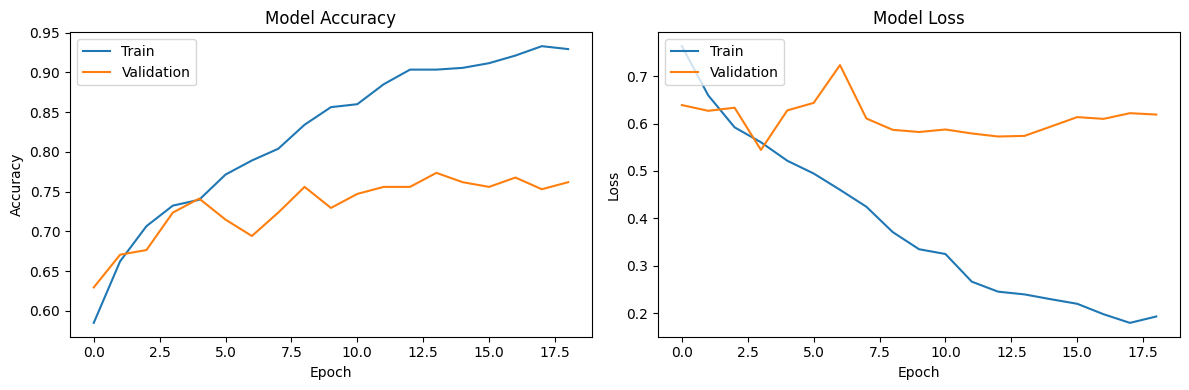

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step
Confusion Matrix: 
[[123  60]
 [ 26 131]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.83      0.67      0.74       183
         1.0       0.69      0.83      0.75       157

    accuracy                           0.75       340
   macro avg       0.76      0.75      0.75       340
weighted avg       0.76      0.75      0.75       340

AUC: 0.7532630259997912
F1 Score: 0.7528735632183908
Precision: 0.6858638743455497
Recall: 0.8343949044585988
Specificity: 0.6721311475409836
Balanced Accuracy: 0.7532630259997912


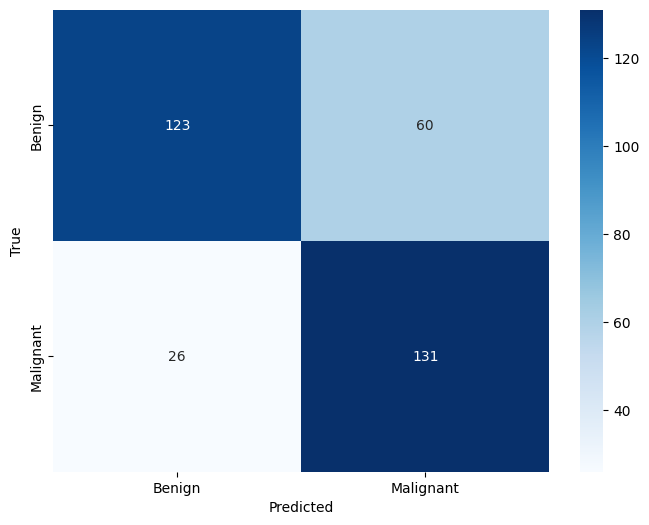

In [ ]:
print(f'Using densenet121 pretrained learning')
print(f'Printing the evaluation metrics for train with adam')
evaluate_model(hist_densenet121)

Using efficientnetv2b0 pretrained model
Printing the evaluation metrics for train with adam


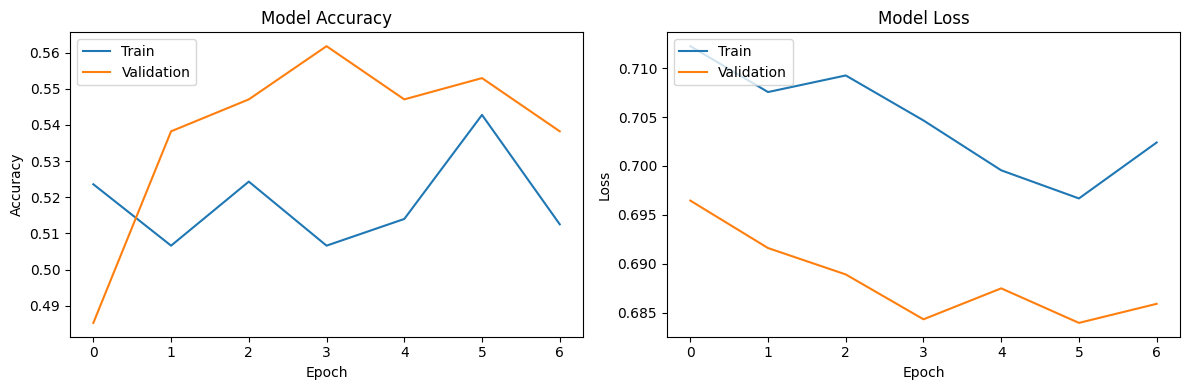

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step
Confusion Matrix: 
[[123  60]
 [ 26 131]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.83      0.67      0.74       183
         1.0       0.69      0.83      0.75       157

    accuracy                           0.75       340
   macro avg       0.76      0.75      0.75       340
weighted avg       0.76      0.75      0.75       340

AUC: 0.7532630259997912
F1 Score: 0.7528735632183908
Precision: 0.6858638743455497
Recall: 0.8343949044585988
Specificity: 0.6721311475409836
Balanced Accuracy: 0.7532630259997912


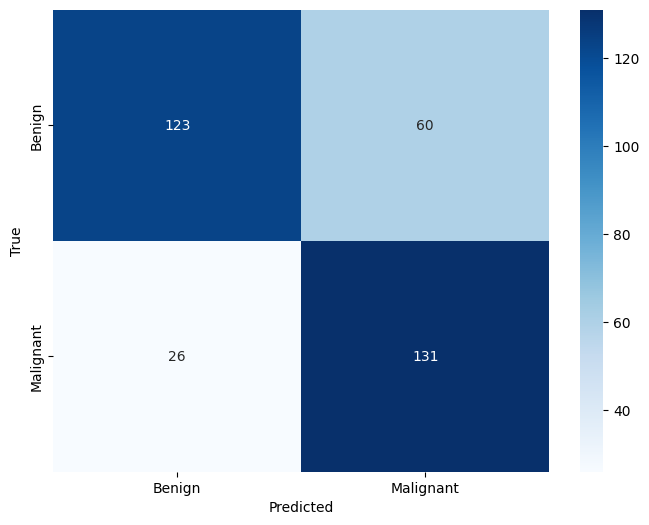

In [ ]:
print(f'Using efficientnetv2b0 pretrained model')
print(f'Printing the evaluation metrics for train with adam')
evaluate_model(hist_effnetv2b0)